## Model with Reduced Dataset (With Numerical Features)

With the reduced dataset, there are four models I want to attempt to train my model on:
- LogisticRegression
- LinearSVC
- DecisionTreeClassifier
- KNeighborsClassifier

These are the steps I will be taking in this notebook:
1. Compare the baseline models for each classifiers but with their respective best performing scalers.
2. Out of the four baseline models, pick the best two and conduct hyperparameter tuning on them.
3. Pick the best performing classifier and its respective hyperparameters.

In [2]:
# Import relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords

import warnings
warnings.filterwarnings('ignore')

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Classifiers used
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [3]:
# Import the reduced datasets
X_train = pd.read_csv('data/reduced_model/X_train_reduced.csv',index_col=0)
X_test = pd.read_csv('data/reduced_model/X_test_reduced.csv',index_col=0)
y_train = pd.read_csv('data/reduced_model/y_train.csv',index_col=0)
y_test = pd.read_csv('data/reduced_model/y_test.csv',index_col=0)

In [4]:
X_train

,date_hour,date_day,date_month,date_weekday,hashtag_counts,user_counts,url_counts,aa,aaa,aaaa,...,z,za,zac,zach,zealand,zero,zombie,zomg,zone,zoo
0,1,15,6,1,0,1,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,18,6,6,6,0,2,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,13,20,6,6,0,1,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,18,15,6,1,0,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,15,6,1,0,1,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,15,15,6,1,0,1,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
79996,14,18,4,6,0,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
79997,2,14,5,4,0,1,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
79998,4,1,6,1,0,1,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Model Selection

I will be comparing the baseline models for each classifiers but with their respective best performing scalers. Given that my laptop will have more computing power, I will definitely implement a GridSearchCV to find the best combinations of scalers, classifiers and their hyperparameter. However, given the current restriction, I will be identifying the best choices in each steps manually.

#### LogisticRegression

In [3]:
# Scale the train and test sets, with three types of scalers
for scaler in [StandardScaler(), MinMaxScaler(), RobustScaler()]:
    
    # Fit the data to scaler
    scaler.fit_transform(X_train)
    scaler.transform(X_test)
    
    # Instantiate and fit to the train set
    Logistic = LogisticRegression()
    
    # Fit the data
    Logistic.fit(X_train,y_train)
    
    # Score the model
    print(scaler)
    print(Logistic.score(X_train,y_train))
    print(Logistic.score(X_test,y_test))

StandardScaler(copy=True, with_mean=True, with_std=True)
0.757425
0.7497
MinMaxScaler(copy=True, feature_range=(0, 1))
0.757425
0.7497
RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True)
0.757425
0.7497


In [4]:
# Create a dataframe to report model accuracy, including train, test and cross validation train accuracy
accuracy_data = {'Training accuracy':  [Logistic.score(X_train,y_train)],
        'Test accuracy': [Logistic.score(X_test,y_test)],
        'Cross validation training accuracy': [np.mean(cross_val_score(Logistic,X_train,y_train))]}

accuracy = pd.DataFrame(accuracy_data, 
                        columns = ['Training accuracy','Test accuracy',
                                   'Cross validation training accuracy'],
                        index = ['logistic w/ robust scaler']
                       )

accuracy

,Training accuracy,Test accuracy,Cross validation training accuracy
logistic w/ robust scaler,0.757425,0.7497,0.756037


#### LinearSVC

In [5]:
# Scale the train and test sets, with three types of scalers
for scaler in [StandardScaler(), MinMaxScaler(), RobustScaler()]:
    
    # Fit the data to scaler
    scaler.fit_transform(X_train)
    scaler.transform(X_test)
    
    # Instantiate and fit to the train set
    SVC = LinearSVC()
    
    # Fit the data
    SVC.fit(X_train,y_train)
    
    # Score the model
    print(scaler)
    print(SVC.score(X_train,y_train))
    print(SVC.score(X_test,y_test))

StandardScaler(copy=True, with_mean=True, with_std=True)
0.790775
0.7569
MinMaxScaler(copy=True, feature_range=(0, 1))
0.7489625
0.71975
RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True)
0.80845
0.76785


It appears that the RobustScaler is the best scaler to use along the LinearSVC:

In [6]:
# Append the accuracy scores of this model to our accuracy score dataframe `accuracy`
accuracy_data = {'Training accuracy':  [SVC.score(X_train,y_train)],
        'Test accuracy': [SVC.score(X_test,y_test)],
        'Cross validation training accuracy': [np.mean(cross_val_score(SVC,X_train,y_train))]
        }

new_accuracy = pd.DataFrame(accuracy_data, index = ["SVC w/ robust scaler"])
accuracy = pd.concat([accuracy,new_accuracy])
accuracy

,Training accuracy,Test accuracy,Cross validation training accuracy
logistic w/ robust scaler,0.757425,0.74970,0.756037
SVC w/ robust scaler,0.808450,0.76785,0.759550


#### DecisionTreeClassifier

In [7]:
# Scale the train and test sets, with three types of scalers
for scaler in [StandardScaler(), MinMaxScaler(), RobustScaler()]:
    
    # Fit the data to scaler
    scaler.fit_transform(X_train)
    scaler.transform(X_test)
    
    # Instantiate and fit to the train set
    DT = DecisionTreeClassifier()
    
    # Fit the data
    DT.fit(X_train,y_train)
    
    # Score the model
    print(scaler)
    print(DT.score(X_train,y_train))
    print(DT.score(X_test,y_test))

StandardScaler(copy=True, with_mean=True, with_std=True)
0.9973625
0.72795
MinMaxScaler(copy=True, feature_range=(0, 1))
0.9973625
0.725
RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True)
0.9973625
0.72675


In [8]:
# Append the accuracy scores of this model to our accuracy score dataframe `accuracy`
accuracy_data = {'Training accuracy':  [DT.score(X_train,y_train)],
        'Test accuracy': [DT.score(X_test,y_test)],
        'Cross validation training accuracy': [np.mean(cross_val_score(DT,X_train,y_train))]
        }

new_accuracy = pd.DataFrame(accuracy_data, index = ["DT w/ robust scaler"])
accuracy = pd.concat([accuracy,new_accuracy])
accuracy

,Training accuracy,Test accuracy,Cross validation training accuracy
logistic w/ robust scaler,0.757425,0.74970,0.756037
SVC w/ robust scaler,0.808450,0.76785,0.759550
DT w/ robust scaler,0.997363,0.72675,0.727087


In [9]:
accuracy

,Training accuracy,Test accuracy,Cross validation training accuracy
logistic w/ robust scaler,0.757425,0.74970,0.756037
SVC w/ robust scaler,0.808450,0.76785,0.759550
DT w/ robust scaler,0.997363,0.72675,0.727087


#### KNeighborsClassifier

In [10]:
# Scale the train and test sets, with three types of scalers
for scaler in [StandardScaler(), MinMaxScaler(), RobustScaler()]:
    
    # Fit the data to scaler
    scaler.fit_transform(X_train)
    scaler.transform(X_test)
    
    # Instantiate and fit to the train set
    KNN = KNeighborsClassifier()
    
    # Fit the data
    KNN.fit(X_train,y_train)
    
    # Score the model
    print(scaler)
    print(KNN.score(X_train,y_train))
    print(KNN.score(X_test,y_test))

StandardScaler(copy=True, with_mean=True, with_std=True)
0.79095
0.6745
MinMaxScaler(copy=True, feature_range=(0, 1))
0.79095
0.6745
RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True)
0.79095
0.6745


### Hyperparamter Tuning for SVC

For hyperparameter tuning, I will be further splitting my train data into train and validation datasets.

In [11]:
# Split the dataset into train and validation set
from sklearn.model_selection import train_test_split
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

X_train1 = X_train1.reset_index(drop=True)
X_val = X_val.reset_index(drop=True)
y_train1 = y_train1.reset_index(drop=True)
y_val = y_val.reset_index(drop=True)

#### LogisticRegression
Two hyperparamters I will be looking into for LogisticRegression, are its penalty and C. Tuning penalty allows us to compare two regularization techniques L1(Lasso Regression) and L2(Ridge Regression), which introduces different penalty term and works along with the regularization parameter C.

In [12]:
from collections import Counter
import numpy as np
from sklearn.linear_model import LogisticRegression

# Fit the data to scaler
scaler = RobustScaler()
scaler.fit_transform(X_train1)
scaler.transform(X_val)

log_comb = []
log_train = []
log_test = []
for i in ['l1','l2']:
    for j in [0.0001,0.001,0.01,0.1,1,10]:
        clf = LogisticRegression(penalty = i ,C = j,solver ='saga')
        clf = clf.fit(X_train1, y_train1)
        # Score the model
        print(i,j)
        log_comb.append([i,j])
        log_train.append(clf.score(X_train1,y_train1))   
        log_test.append(clf.score(X_val,y_val))

l1 0.0001
l1 0.001
l1 0.01
l1 0.1
l1 1
l1 10
l2 0.0001
l2 0.001
l2 0.01
l2 0.1
l2 1
l2 10


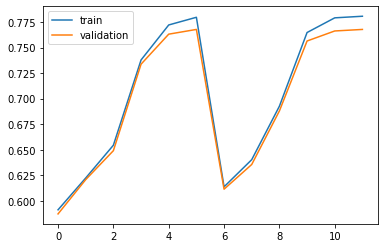

In [13]:
plt.figure()
plt.plot(range(0,len(log_comb)),log_train,label='train')
plt.plot(range(0,len(log_comb)),log_test,label='validation')
plt.legend()
plt.show()

It appears that the best combination of hyperparameters would be when penalty = l1 and C = 10. Now let's apply them to our train and test sets.

In [14]:
# Fit the data to scaler
scaler = RobustScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)

# Instantiate the model
clf = LogisticRegression(penalty = 'l1',C = 10,solver='saga')
clf = clf.fit(X_train, y_train)

# Score the model
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))

0.7826625
0.7694


#### LinearSVC
Two hyperparamters I will be looking into for LinearSVC, are its class_weight and C. The reason why class_weight is choosen, is because in the baseline model, I have seen a relatively high false negative rate and low recall rate, leading to less tweets being classified as positive. I have also chosen to tune the regularization parameter C for structural risk minimisation.

In [15]:
from collections import Counter
import numpy as np
from sklearn.svm import LinearSVC

# Fit the data to scaler
scaler = RobustScaler()
scaler.fit_transform(X_train1)
scaler.transform(X_val)

svc_comb = []
svc_counter = []
svc_score = []
for i in [0.0001,0.001,0.01,0.1,1,10]:
    for j in range(2,6):
        clf = LinearSVC(C = i ,class_weight={-1: 1, 1: j})
        clf = clf.fit(X_train1, y_train1)
        # Score the model
        svc_comb.append([i,j])
        svc_counter.append(Counter(clf.predict(X_val)))
        svc_score.append(clf.score(X_val,y_val))

In [16]:
svc_parameters = {'Combination':  svc_comb,
        'Counter': svc_counter,
        'Training accuracy': svc_score
        }

svc_parameters = pd.DataFrame(svc_parameters)
svc_parameters

,Combination,Counter,Training accuracy
0,"[0.0001, 2]","{1: 15638, -1: 362}",0.511938
1,"[0.0001, 3]",{1: 16000},0.495937
2,"[0.0001, 4]",{1: 16000},0.495937
3,"[0.0001, 5]",{1: 16000},0.495937
4,"[0.001, 2]","{-1: 2368, 1: 13632}",0.618437
5,"[0.001, 3]","{1: 15410, -1: 590}",0.531312
6,"[0.001, 4]","{1: 15803, -1: 197}",0.508000
7,"[0.001, 5]","{1: 15903, -1: 97}",0.501875
8,"[0.01, 2]","{-1: 4665, 1: 11335}",0.723250
9,"[0.01, 3]","{-1: 3151, 1: 12849}",0.665375


It appears that the best combination of hyperparameters might be when C=1(default) and class_weight={-1: 1, 1: 4}, in terms of model accuracy and the classification balance. Now let's apply it to our train and test set.

In [17]:
# Fit the data to scaler
scaler = RobustScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)

# Instantiate the model
clf = LinearSVC(C = 1 ,class_weight={-1: 1, 1: 5})
clf = clf.fit(X_train, y_train)

# Score the model
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))

0.781875
0.7455


To further investigate whether or not the model was able to resolve the issue with low recall rate, I will be assessing it with the confusion matrix.

In [18]:
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[6590, 3428],
       [1662, 8320]])

### Best Performing Model

It appears that out of the two classifiers after hyperparameter tunings, the best performing model is the SVC model with `class_weight = {-1: 1, 1: 5}` and `C = 1`. Hence, we will be using this model to derive sentiments from the real-time Twitter data. 

In [19]:
import pickle
filename = 'pickle/svc_reduced_model.sav'
# save the model to disk
pickle.dump(clf, open(filename, 'wb'))

## Model with Reduced Dataset (Without Numerical Features)